<a href="https://colab.research.google.com/github/RamanEbrahimi/ComputationalPhysics/blob/main/JuliaSet_Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
def julia(zx, zy, cx, cy, threshold):
    # z[0] = zx + i * zy
    # c = x + i * y
    # z[n + 1] = z[n]**2 + c 

    # initial conditions
    z = complex(zx, zy)
    c = complex(cx, cy)
    power = 2

    for i in range(threshold):
        z = z**power + c
        if abs(z) > 1:  # it diverged
            return i
    return threshold - 1  # it didn't diverge

In [ ]:
x_start, y_start = -2, -2  # region
width, height = 4, 4  # for 3 units to the left and to the right
density_per_unit = 200  # pixles per unit

re = np.linspace(x_start, x_start + width, width * density_per_unit )  # real axis
im = np.linspace(y_start, y_start + height, height * density_per_unit)  # imaginary axis

X = np.empty((len(re), len(im)))  # the initial array-like image

In [ ]:
threshold = 30  # max allowed iterations

# c = r * cos(a) + i * r * sin(a) = r * e^{i * a}
r = 0.7
a = np.pi / 3
cx, cy = r * np.cos(a), r * np.sin(a)
c = complex(cx, cy)
power = 2

# fill-in the image with the number of iterations
for i in range(len(re)):
    for j in range(len(im)):
        X[i, j] = julia(zx=re[i], zy=im[j], cx=cx, cy=cy, threshold=threshold)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  """


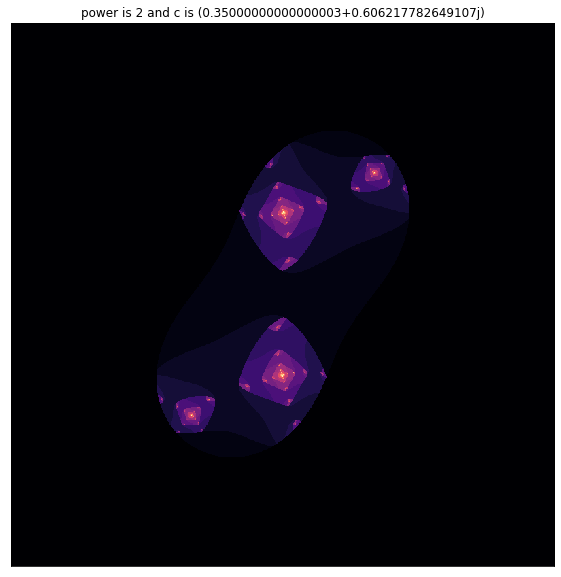

In [ ]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes()
ax.set_xticks([], [])
ax.set_yticks([], [])

ax.imshow(X.T, interpolation='nearest', cmap='magma')
plt.title('power is ' + str(power) + ' and c is ' + str(c))
plt.savefig('julia_Set' + str(power) + str(c) + '.png', dpi=300, bbox_inches='tight')

In [ ]:
# ANIMATION
x_start, y_start = -2, -2
width, height = 4, 4
density_per_unit = 200

re = np.linspace(x_start, x_start + width, width * density_per_unit )  # real axis
im = np.linspace(y_start, y_start + height, height * density_per_unit)  # imaginary axis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter 

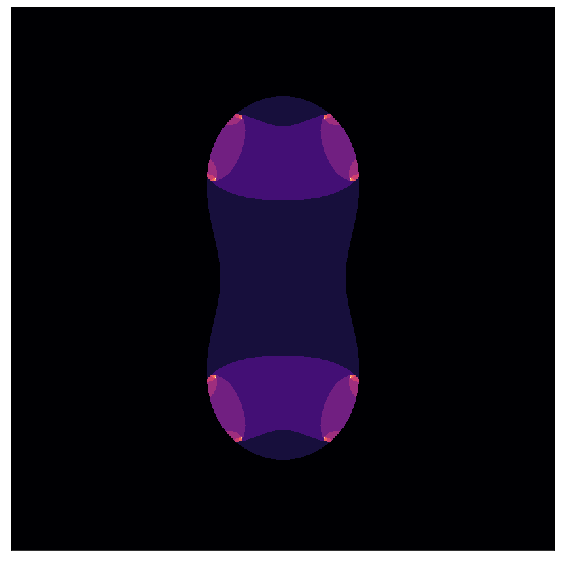

In [ ]:
threshold = 30
frames = 1000  # number of frames in the animation
as_mp4 = True

r = 0.7885
a = np.linspace(0, 2*np.pi, frames)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

def animate(i):
    ax.clear()
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    
    X = np.empty((len(re), len(im)))
    cx, cy = r * np.cos(a[i]), r * np.sin(a[i])
    
    # fill-in the image with the number of interations
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = julia(zx=re[i], zy=im[j], cx=cx, cy=cy, threshold=threshold)
    
    img = ax.imshow(X.T, interpolation='nearest', cmap='magma')
    return [img]

# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)

if as_mp4:
    # save the animation as a mp4 file 
    anim.save('julia_set.mp4') 
else:
    anim.save('julia_set.gif', writer='Me')